# 1 — Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# 2 — Chargement du dataset USArrests

In [13]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**Questions TP :**

1. Combien y a-t-il d’États ?

2. Quelles sont les quatre variables analysées ?

50 etats df.shape()
murder(meurtre),assult(nbre d'agression),urbanpop(urbaine/rurale) et rape

# 3 — Description des données

In [14]:
print(df.shape)
print(df.info())
df.describe()


(50, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Questions TP :**

3. Quels sont les ordres de grandeur des variables ?
4. Pourquoi devra-t-on standardiser les données ?

min/max de chaque variable
pour evité l'effet de l'echele

# 4 — Standardisation

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 1:])  # Murder, Assault, UrbanPop, Rape
X_scaled[:5]


array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393]])

**Questions TP :**

5. Que signifie “standardiser” ?
6. Pourquoi est-ce indispensable pour le clustering ?

la standarisation et centrer et reduire les valeurs en sousteaire la mmoyenne et deviser par l'ecart type
pour voir les classes du dataset

# 5 — Clustering hiérarchique (méthode Ward)     

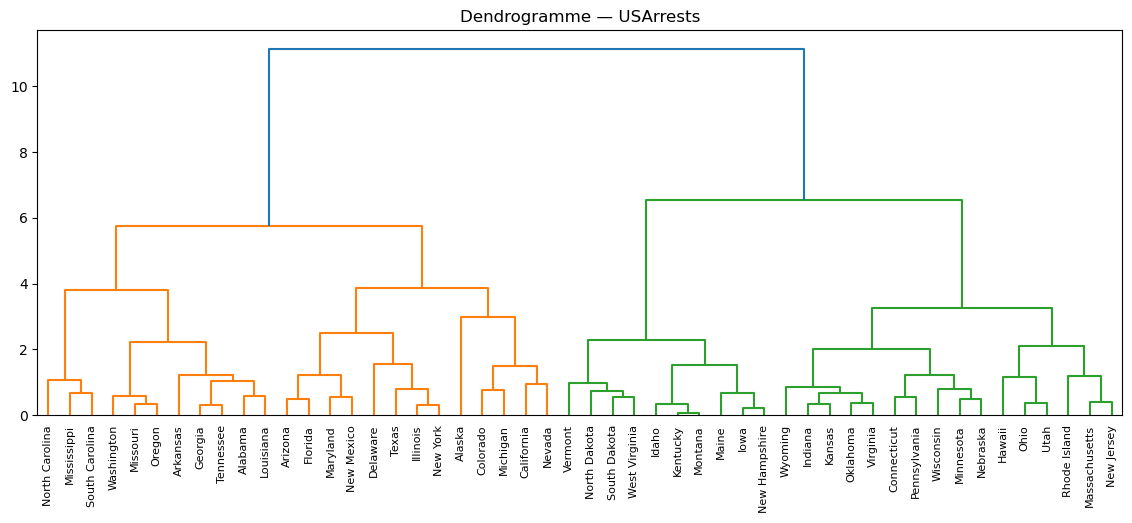

In [16]:
Z = linkage(X_scaled, method="ward")
plt.figure(figsize=(14, 5))
dendrogram(Z, labels=df.index.tolist(), leaf_rotation=90)
plt.title("Dendrogramme — USArrests")
plt.show()


**Questions TP :**

7. Comment interpréter les grandes hauteurs dans le dendrogramme ?
8. À vue d’œil, quel nombre de clusters semble raisonnable ?